In [ ]:
# 'Pandas' is used for data manipulation and analysis
import pandas as pd

# 'Numpy' is used for mathematical operations on large, multi-dimensional arrays and matrices
import numpy as np

# 'Matplotlib' is a data visualization library for 2D and 3D plots, built on numpy
import matplotlib.pyplot as plt
import seaborn as sns

# import various functions to perform classification
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics


In [ ]:
bank = pd.read_csv('/content/new_train.csv')
test = pd.read_csv('/content/new_test.csv')

In [ ]:
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no


In [ ]:
catcols = bank.select_dtypes(include='object')
catcols.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

In [ ]:
numcols = bank.select_dtypes(include="int64")
numcols.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

In [ ]:
X

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome
0,49,1,1,2,1,0,0,0,7,4,227,4,999,0,1
1,37,2,1,6,0,0,0,1,7,4,202,2,999,1,0
2,78,5,1,0,0,0,0,0,3,1,1148,1,999,0,1
3,36,0,1,6,0,2,0,1,6,1,120,2,999,0,1
4,59,5,0,6,0,0,0,0,4,3,368,2,999,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,28,7,2,3,0,2,0,0,3,3,192,1,999,0,1
32946,52,9,1,5,0,2,0,0,7,0,64,1,999,1,0
32947,54,0,1,2,0,0,2,0,3,1,131,4,999,0,1
32948,29,0,1,6,0,0,0,1,6,0,165,1,999,0,1


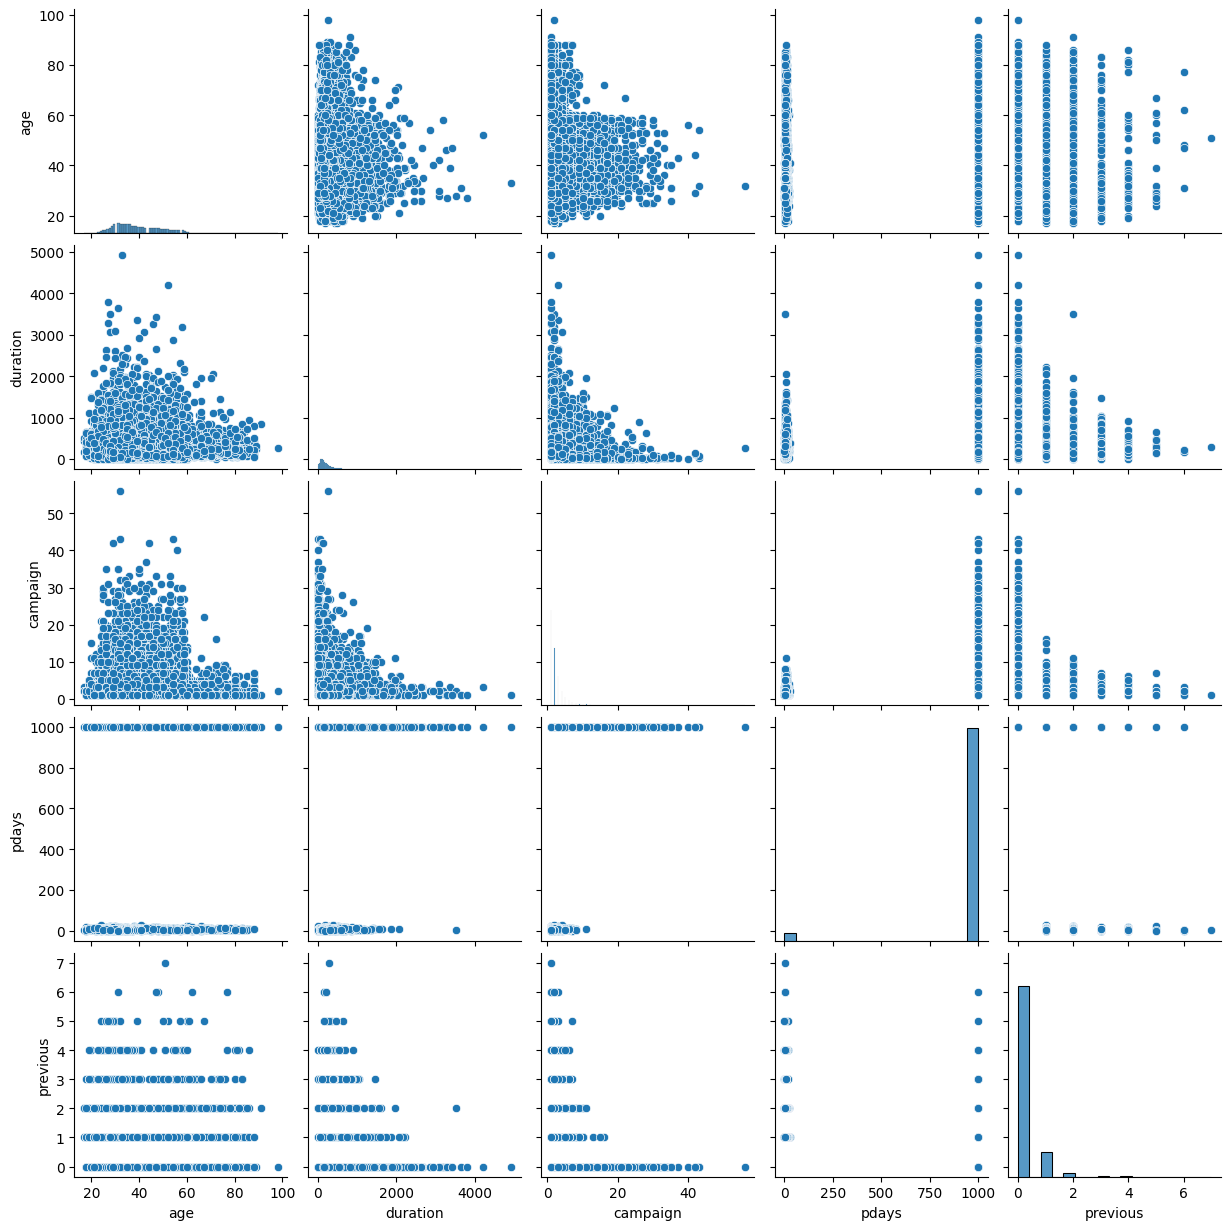

In [ ]:
sns.pairplot(bank)

In [ ]:
# Extracting categorical columns:
catFeatures= [col for col in bank.columns if col in
              bank.select_dtypes(include=object).columns]

# # Extracting All Features:
features = [col for col in bank.columns if col not in ['y']]

print(features)
catFeatures

['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome']


['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'y']

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encoding Categorical Data
labelEncode = LabelEncoder()

# Iterating Over each categorial features:
for col in catFeatures:
    # storing its numerical value:
    X[col] = labelEncode.fit_transform(bank[col])

In [ ]:
std =StandardScaler()
X=std.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X=X.drop(["y",'previous','pdays'],axis=1)
y=bank[["y"]]
X.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome
0,49,1,1,2,1,0,0,0,7,4,227,4,1
1,37,2,1,6,0,0,0,1,7,4,202,2,0
2,78,5,1,0,0,0,0,0,3,1,1148,1,1
3,36,0,1,6,0,2,0,1,6,1,120,2,1
4,59,5,0,6,0,0,0,0,4,3,368,2,1


In [ ]:
X_train

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome
26465,30,9,1,5,0,2,2,0,5,3,147,1,999,0,1
1387,48,7,0,3,0,1,1,0,0,1,124,1,999,1,0
22628,37,1,2,5,0,2,2,0,6,4,161,1,999,0,1
8336,39,0,2,3,0,0,0,1,4,1,202,1,999,0,1
19898,52,6,0,6,0,2,0,1,6,0,258,3,999,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16850,60,0,2,3,0,0,0,1,4,0,118,1,999,0,1
6265,31,3,1,0,1,2,0,1,4,4,328,4,999,0,1
11284,29,7,2,3,0,0,0,0,4,4,725,2,3,1,2
860,36,7,2,3,0,0,0,0,6,4,15,7,999,0,1


In [ ]:
models = {
    "                   Logistic Regression": LogisticRegression(),
    "                  Gaussian Naive Bayes": GaussianNB(),
    "                   K-Nearest Neighbors": KNeighborsClassifier(),
    "                Support Vector Machine": SVC(),
    "                          RandomForest": RandomForestClassifier()
}

for name, model in models.items():
    model.fit(X_res_tr, y_res_tr)
    print(name + " trained.")

                   Logistic Regression trained.
                  Gaussian Naive Bayes trained.
                   K-Nearest Neighbors trained.
                Support Vector Machine trained.
                          RandomForest trained.


In [ ]:
X_train

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome
26465,30,9,1,5,0,2,2,0,5,3,147,1,999,0,1
1387,48,7,0,3,0,1,1,0,0,1,124,1,999,1,0
22628,37,1,2,5,0,2,2,0,6,4,161,1,999,0,1
8336,39,0,2,3,0,0,0,1,4,1,202,1,999,0,1
19898,52,6,0,6,0,2,0,1,6,0,258,3,999,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16850,60,0,2,3,0,0,0,1,4,0,118,1,999,0,1
6265,31,3,1,0,1,2,0,1,4,4,328,4,999,0,1
11284,29,7,2,3,0,0,0,0,4,4,725,2,3,1,2
860,36,7,2,3,0,0,0,0,6,4,15,7,999,0,1


In [ ]:
models = {
    "                   Logistic Regression": LogisticRegression(),
    "                  Gaussian Naive Bayes": GaussianNB(),
    "                   K-Nearest Neighbors": KNeighborsClassifier(),
    "                Support Vector Machine": SVC(),
    "                          RandomForest": RandomForestClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    print(name + " trained.")

                   Logistic Regression trained.
                  Gaussian Naive Bayes trained.
                   K-Nearest Neighbors trained.
                Support Vector Machine trained.
                          RandomForest trained.


In [ ]:
X_train

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome
26465,30,9,1,5,0,2,2,0,5,3,147,1,999,0,1
1387,48,7,0,3,0,1,1,0,0,1,124,1,999,1,0
22628,37,1,2,5,0,2,2,0,6,4,161,1,999,0,1
8336,39,0,2,3,0,0,0,1,4,1,202,1,999,0,1
19898,52,6,0,6,0,2,0,1,6,0,258,3,999,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16850,60,0,2,3,0,0,0,1,4,0,118,1,999,0,1
6265,31,3,1,0,1,2,0,1,4,4,328,4,999,0,1
11284,29,7,2,3,0,0,0,0,4,4,725,2,3,1,2
860,36,7,2,3,0,0,0,0,6,4,15,7,999,0,1


In [ ]:
for name, model in models.items():
    print(name + ": {:.2f}%".format(model.score(X_test, y_test) * 100))

                   Logistic Regression: 99.79%
                  Gaussian Naive Bayes: 100.00%
                   K-Nearest Neighbors: 89.30%
                Support Vector Machine: 89.76%
                          RandomForest: 100.00%


In [ ]:
for name, model in models.items():
    print(name + ": {:.2f}%".format(model.score(X_res_ts, y_res_ts) * 100))

                   Logistic Regression: 98.59%
                  Gaussian Naive Bayes: 100.00%
                   K-Nearest Neighbors: 76.62%
                Support Vector Machine: 78.19%
                          RandomForest: 100.00%


In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
tr_pred = lr.predict(X_train)

print(classification_report(y_train,tr_pred))

              precision    recall  f1-score   support

          no       1.00      1.00      1.00     23440
         yes       1.00      0.99      0.99      2920

    accuracy                           1.00     26360
   macro avg       1.00      0.99      1.00     26360
weighted avg       1.00      1.00      1.00     26360



In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res_tr, y_res_tr = sm.fit_resample(X_train, y_train)
X_res_ts, y_res_ts = sm.fit_resample(X_test, y_test)

X_new, y_new = sm.fit_resample(X,y)
X_train,y_train, X_test,y_test = train_test_split(X_new,y_new)

In [ ]:
y_train

,y
26465,no
1387,no
22628,no
8336,no
19898,no
...,...
16850,no
6265,no
11284,yes
860,no


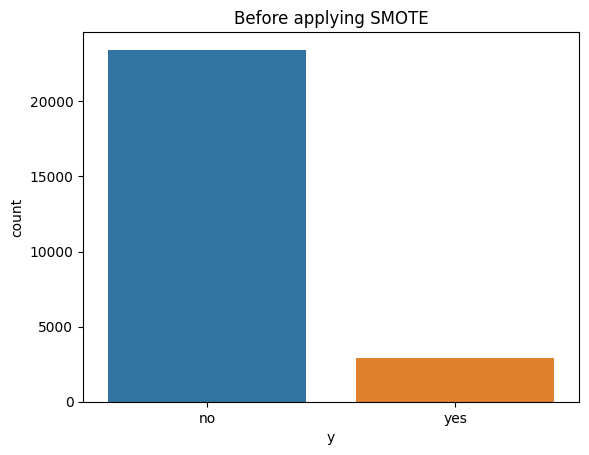

In [ ]:
sns.countplot(x ='y', data = y_train)
plt.title('Before applying SMOTE')
plt.show()

In [ ]:
sns.countplot(x ='y', data = y_res_tr)
plt.title('After applying SMOTE')
plt.show()

In [ ]:
lr = LogisticRegression()
lr.fit(X_res_tr, y_res_tr)
tr_pred = lr.predict(X_res_tr)

print(classification_report(y_res_tr,tr_pred))

              precision    recall  f1-score   support

          no       0.99      0.99      0.99     23440
         yes       0.99      0.99      0.99     23440

    accuracy                           0.99     46880
   macro avg       0.99      0.99      0.99     46880
weighted avg       0.99      0.99      0.99     46880



In [ ]:
test.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome
0,32,4,0,6,0,0,0,0,3,3,131,5,1
1,37,10,3,6,0,0,0,0,4,3,100,1,1
2,55,5,0,5,1,2,0,0,3,2,131,2,1
3,44,2,1,0,1,0,0,1,4,3,48,2,1
4,28,0,2,3,0,0,0,0,5,0,144,2,1


In [ ]:
X_train =

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
26465,30,9,1,5,0,2,2,0,5,3,147,1,999,0,1,0
1387,48,7,0,3,0,1,1,0,0,1,124,1,999,1,0,0
22628,37,1,2,5,0,2,2,0,6,4,161,1,999,0,1,0
8336,39,0,2,3,0,0,0,1,4,1,202,1,999,0,1,0
19898,52,6,0,6,0,2,0,1,6,0,258,3,999,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16850,60,0,2,3,0,0,0,1,4,0,118,1,999,0,1,0
6265,31,3,1,0,1,2,0,1,4,4,328,4,999,0,1,0
11284,29,7,2,3,0,0,0,0,4,4,725,2,3,1,2,1
860,36,7,2,3,0,0,0,0,6,4,15,7,999,0,1,0


In [ ]:
test = test.drop()

In [ ]:
y_predicted= model.predict(test)
y_predicted

array(['no', 'no', 'no', ..., 'no', 'no', 'no'], dtype=object)

In [ ]:
# dataset of predicted values for target variable y
prediction= pd.DataFrame(y_predicted, columns=["y_predicted"])

prediction_dataset= pd.concat([test, prediction], axis=1)
prediction_dataset
prediction_dataset.to_csv('output.csv', index=False)